## Support Vector Machine.
## Q.2) Prepare a classification model using SVM for salary data.
### ANSWER:

In [1]:
#Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#Import the data
salary_train=pd.read_csv("SDTrain.csv")
salary_test=pd.read_csv("SDTest.csv")

In [3]:
#Join the data
df = salary_train.merge(salary_test,how='outer')

In [4]:
# To find the top five rows
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#TO find null values
df.isna().sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# Let's find the
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
null_columns =['workclass','occupation','native']
for i in null_columns:
    df.fillna(df[i].mode()[0], inplace=True)

In [9]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Visualisation

In [10]:
corr=df.corr()

<AxesSubplot:>

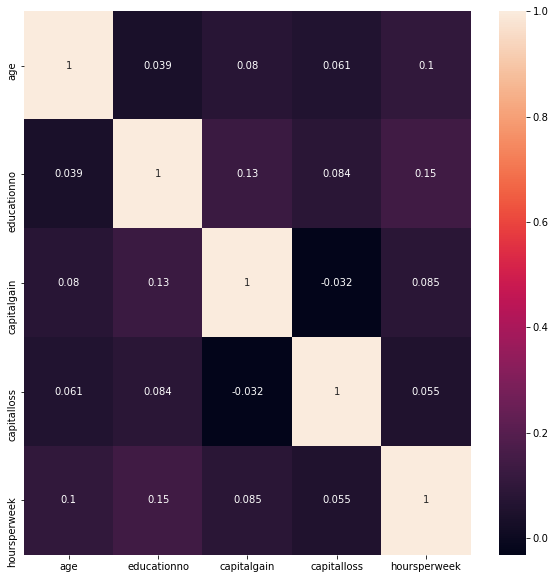

In [11]:
#correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

<AxesSubplot:xlabel='count', ylabel='workclass'>

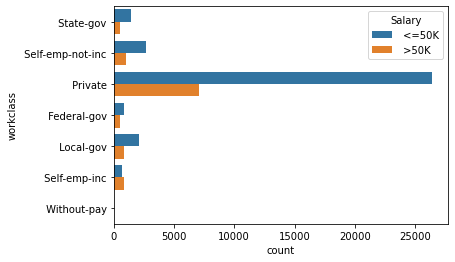

In [12]:
sns.countplot(y=df['workclass'], hue=df['Salary'])

From here we can say that most of the people having salary less than 50k

<AxesSubplot:xlabel='sex', ylabel='count'>

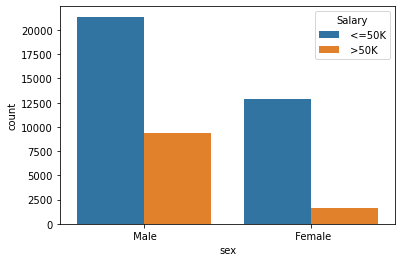

In [13]:
sns.countplot(df['sex'], hue=df['Salary'])

 Here we can say most of the people working are having salary less than 50k

<AxesSubplot:xlabel='race', ylabel='count'>

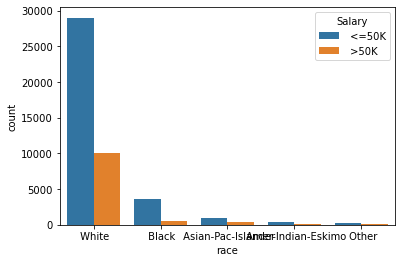

In [14]:
sns.countplot(x=df['race'], hue=df['Salary'])

<AxesSubplot:xlabel='count', ylabel='education'>

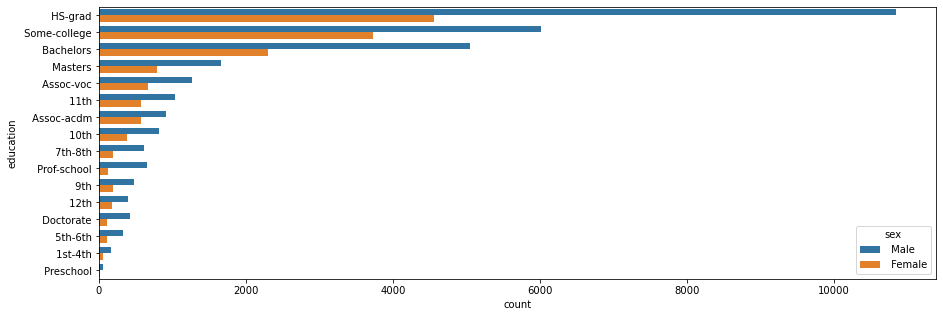

In [15]:
fig = plt.figure(figsize=(15,5))
sns.countplot(y=df['education'], hue=df['sex'], order = df['education'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='relationship'>

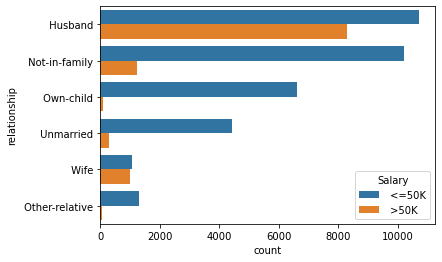

In [16]:
sns.countplot(y=df['relationship'], hue=df['Salary'], order = df['relationship'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='maritalstatus'>

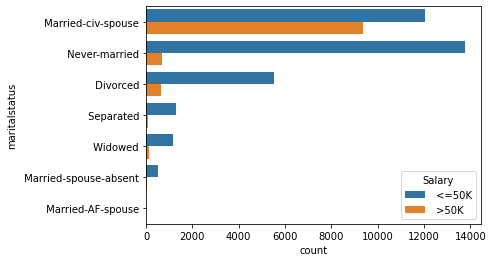

In [17]:
sns.countplot(y=df['maritalstatus'], hue=df['Salary'], order = df['maritalstatus'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='education'>

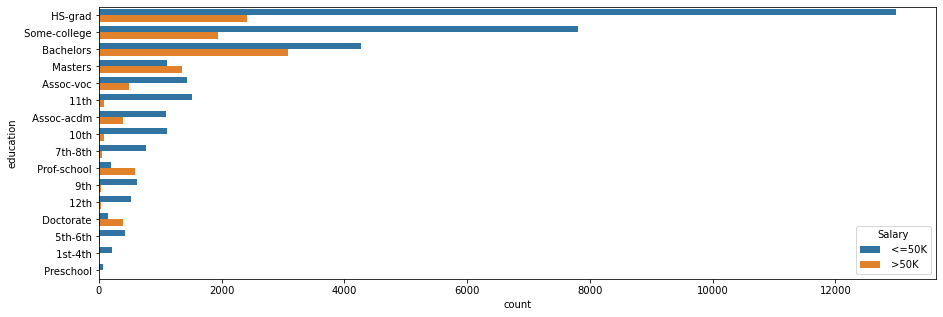

In [18]:
fig = plt.figure(figsize=(15,5))
sns.countplot(y=df['education'], hue=df['Salary'], order = df['education'].value_counts().index)

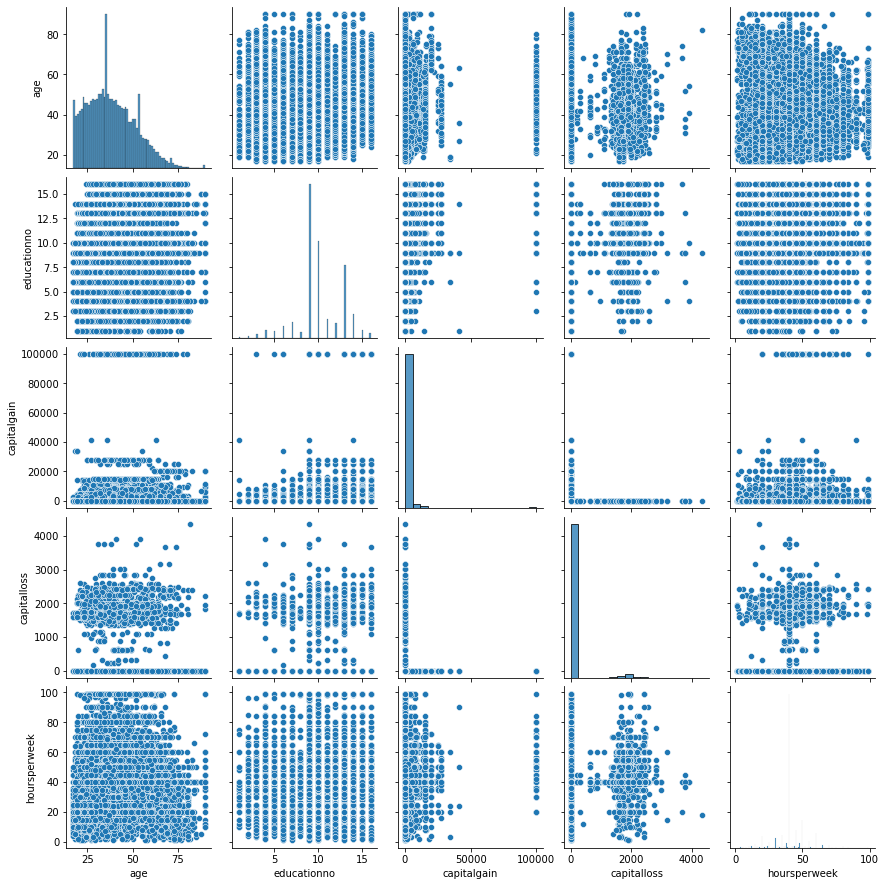

In [19]:
sns.pairplot(df)

In [20]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Checking Unique Values

In [21]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [22]:
df["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [23]:
df["maritalstatus"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [24]:
df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [25]:
df["relationship"].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [26]:
df["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [27]:
df["sex"].unique()

array([' Male', ' Female'], dtype=object)

In [28]:
df["native"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

As we have many unique values of native column so we will store its count in a dictonary and then map it on the dataset

In [29]:
native=df["native"].value_counts().to_dict()

In [30]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### ENCODING CATEGORICAL VALUES

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [32]:
df_cols=("workclass","education","maritalstatus","occupation","relationship","race","sex")
for i in df_cols:
    df[i]=le.fit_transform(df[i])

In [33]:
df1=df.drop(["native"], axis=1)

### SPLITTING DATASET INTO DEPENDENT AND INDEPENDENT

In [34]:
X=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values

In [35]:
#SPLITTING DATASET INTO TRAINING AND TEST SET
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
#TRAINING THE DATASET ON LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [37]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[' <=50K' ' <=50K']
 [' <=50K' ' >50K']
 [' <=50K' ' <=50K']
 ...
 [' <=50K' ' >50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']]


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[6541  356]
 [1395  764]]


0.8066475265017667

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier_2 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [40]:
y_pred_2 = classifier_2.predict(X_test)
print(np.concatenate((y_pred_2.reshape(len(y_pred_2),1), y_test.reshape(len(y_test),1)),1))

[[' <=50K' ' <=50K']
 [' >50K' ' >50K']
 [' <=50K' ' <=50K']
 ...
 [' <=50K' ' >50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']]


In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_2)
print(cm)
accuracy_score(y_test, y_pred_2)


[[6386  511]
 [ 812 1347]]


0.8539090106007067

### We got an accuracy higher than logistic regression

In [42]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, y_train)

# Predicting the result and giving the accuracy
score = classifier.score(X_test, y_test)

print(score)

0.8097393992932862
